In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [200]:
file_path = Path("../Data/Raw/Psychological_Assessment_Dataset.csv")

data = pd.read_csv(file_path)

data.shape

(9504, 11)

In [201]:
data.head()

,Mood: How would you describe your mood over the past two weeks?,"Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?",Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?,Sleep Quality: How would you rate the quality of your sleep over the past week?,Appetite Change: Have you noticed any significant changes in your appetite?,Lack of Interest: How often have you felt a lack of interest or pleasure in daily activities?,Enjoyable Activities: How often do you engage in activities you enjoy or that help you relax?,"Physical Anxiety Symptoms: Have you had any physical symptoms of anxiety (e.g., heart palpitations, sweating, shortness of breath)?",Concentration Difficulty: How often do you find it difficult to concentrate on tasks?,Coping Strategies: What coping strategies have you used when feeling stressed or anxious?,Condition Summary
0,Happiness,Mildly anxious,Family issues,Early morning waking,Increased cravings,Occasionally,Rarely,"Yes, occasionally",Occasionally,Physical activity,Sleep Disorders: Sleep disturbances potentiall...
1,Irritability,Somewhat anxious,Work-related stress,Restful,Fluctuates daily,Always,A few times a week,"Yes, occasionally",Constantly,Journaling or writing,Stress-Related Conditions: Stress due to ident...
2,Happiness,Slightly anxious,Work-related stress,Early morning waking,Fluctuates daily,Always,Once a week,"Yes, occasionally",Constantly,Journaling or writing,Sleep Disorders: Sleep disturbances potentiall...
3,Fluctuating,Somewhat anxious,None of the above,Interrupted,Fluctuates daily,Frequently,Never,"Yes, frequently",Occasionally,Physical activity,Mood Disorders: Indicators include mood instab...
4,Extreme sadness,Very anxious,Family issues,Difficulty staying asleep,Loss of appetite,Rarely,A few times a week,Rarely,Constantly,No coping strategies,Mood Disorders: Indicators include mood instab...


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 11 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                               --------------  ----- 
 0   Mood: How would you describe your mood over the past two weeks?                                                                      9504 non-null   object
 1   Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?                             9504 non-null   object
 2   Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?                                      9504 non-null   object
 3   Sleep Quality: How would you rate the quality of your sleep over the past week?    

In [203]:
data.isna().sum()

Mood: How would you describe your mood over the past two weeks?                                                                        0
Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?                               0
Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?                                        0
Sleep Quality: How would you rate the quality of your sleep over the past week?                                                        0
Appetite Change: Have you noticed any significant changes in your appetite?                                                            0
Lack of Interest: How often have you felt a lack of interest or pleasure in daily activities?                                          0
Enjoyable Activities: How often do you engage in activities you enjoy or that help you relax?                                          0
Physical Anxiety Symptoms: Have you had a

In [204]:
df = data.copy()

df["condition_label"] = (
    df["Condition Summary"]
    .str.split(":", n=1)
    .str[0]
    .str.strip()
)

df["condition_label"].value_counts()

condition_label
Sleep Disorders                   3606
Mood Disorders                    2702
Generalized Anxiety Disorder      1375
Stress-Related Conditions          937
Eating Disorders                   452
Cognitive Impairments              216
General Mental Health              158
Coping and Resilience               39
Post-Traumatic Stress Disorder      19
Name: count, dtype: int64

In [205]:
df = df.drop(columns=["Condition Summary"])

df.head()

,Mood: How would you describe your mood over the past two weeks?,"Anxious Social Scale: On a scale of 1-10, how often have you felt anxious in social situations recently?",Anxiety Triggers: Have you experienced any of the following anxiety triggers in the past month?,Sleep Quality: How would you rate the quality of your sleep over the past week?,Appetite Change: Have you noticed any significant changes in your appetite?,Lack of Interest: How often have you felt a lack of interest or pleasure in daily activities?,Enjoyable Activities: How often do you engage in activities you enjoy or that help you relax?,"Physical Anxiety Symptoms: Have you had any physical symptoms of anxiety (e.g., heart palpitations, sweating, shortness of breath)?",Concentration Difficulty: How often do you find it difficult to concentrate on tasks?,Coping Strategies: What coping strategies have you used when feeling stressed or anxious?,condition_label
0,Happiness,Mildly anxious,Family issues,Early morning waking,Increased cravings,Occasionally,Rarely,"Yes, occasionally",Occasionally,Physical activity,Sleep Disorders
1,Irritability,Somewhat anxious,Work-related stress,Restful,Fluctuates daily,Always,A few times a week,"Yes, occasionally",Constantly,Journaling or writing,Stress-Related Conditions
2,Happiness,Slightly anxious,Work-related stress,Early morning waking,Fluctuates daily,Always,Once a week,"Yes, occasionally",Constantly,Journaling or writing,Sleep Disorders
3,Fluctuating,Somewhat anxious,None of the above,Interrupted,Fluctuates daily,Frequently,Never,"Yes, frequently",Occasionally,Physical activity,Mood Disorders
4,Extreme sadness,Very anxious,Family issues,Difficulty staying asleep,Loss of appetite,Rarely,A few times a week,Rarely,Constantly,No coping strategies,Mood Disorders


In [206]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("?", "", regex=False)
)

df.columns

Index(['mood:_how_would_you_describe_your_mood_over_the_past_two_weeks',
       'anxious_social_scale:_on_a_scale_of_1-10,_how_often_have_you_felt_anxious_in_social_situations_recently',
       'anxiety_triggers:_have_you_experienced_any_of_the_following_anxiety_triggers_in_the_past_month',
       'sleep_quality:_how_would_you_rate_the_quality_of_your_sleep_over_the_past_week',
       'appetite_change:_have_you_noticed_any_significant_changes_in_your_appetite',
       'lack_of_interest:_how_often_have_you_felt_a_lack_of_interest_or_pleasure_in_daily_activities',
       'enjoyable_activities:_how_often_do_you_engage_in_activities_you_enjoy_or_that_help_you_relax',
       'physical_anxiety_symptoms:_have_you_had_any_physical_symptoms_of_anxiety_(e.g.,_heart_palpitations,_sweating,_shortness_of_breath)',
       'concentration_difficulty:_how_often_do_you_find_it_difficult_to_concentrate_on_tasks',
       'coping_strategies:_what_coping_strategies_have_you_used_when_feeling_stressed_or_anx

In [207]:
print("Missing values BEFORE dropna:")
print(df.isna().sum().sort_values(ascending=False).head(10))

Missing values BEFORE dropna:
mood:_how_would_you_describe_your_mood_over_the_past_two_weeks                                                                        0
anxious_social_scale:_on_a_scale_of_1-10,_how_often_have_you_felt_anxious_in_social_situations_recently                               0
anxiety_triggers:_have_you_experienced_any_of_the_following_anxiety_triggers_in_the_past_month                                        0
sleep_quality:_how_would_you_rate_the_quality_of_your_sleep_over_the_past_week                                                        0
appetite_change:_have_you_noticed_any_significant_changes_in_your_appetite                                                            0
lack_of_interest:_how_often_have_you_felt_a_lack_of_interest_or_pleasure_in_daily_activities                                          0
enjoyable_activities:_how_often_do_you_engage_in_activities_you_enjoy_or_that_help_you_relax                                          0
physical_anxiety_s

In [208]:
before_rows = df.shape[0]

df = df.dropna()

after_rows = df.shape[0]

print("Rows before:", before_rows)
print("Rows after dropping missing values:", after_rows)

Rows before: 9504
Rows after dropping missing values: 9504


In [209]:
print("Missing values AFTER dropna:")
print(df.isna().sum().sum())

Missing values AFTER dropna:
0


In [210]:
df.shape

(9504, 11)

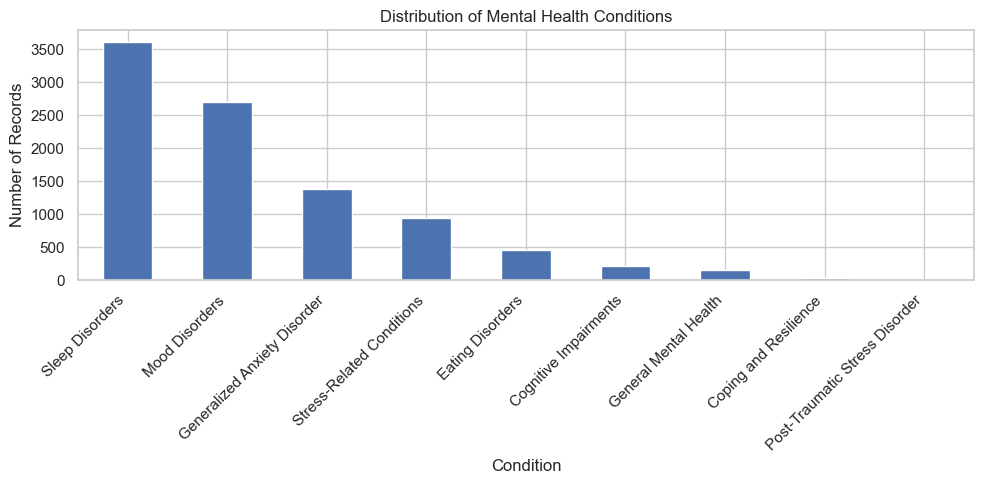

In [211]:
plt.figure(figsize=(10, 5))
df["condition_label"].value_counts().plot(kind="bar")
plt.title("Distribution of Mental Health Conditions")
plt.xlabel("Condition")
plt.ylabel("Number of Records")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

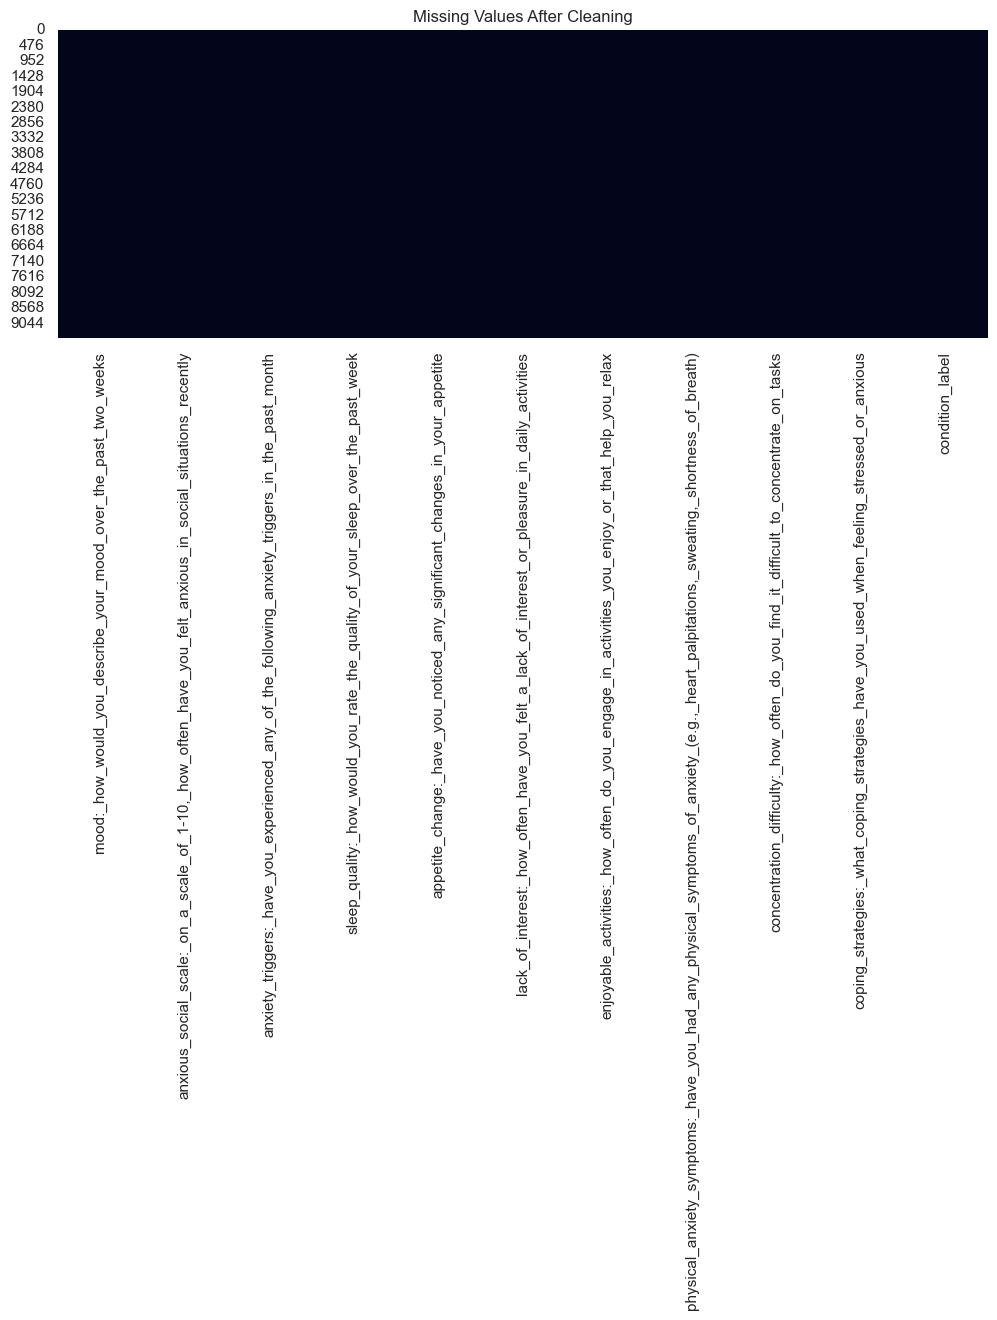

In [212]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values After Cleaning")
plt.show()

In [213]:
list(df.columns)

['mood:_how_would_you_describe_your_mood_over_the_past_two_weeks',
 'anxious_social_scale:_on_a_scale_of_1-10,_how_often_have_you_felt_anxious_in_social_situations_recently',
 'anxiety_triggers:_have_you_experienced_any_of_the_following_anxiety_triggers_in_the_past_month',
 'sleep_quality:_how_would_you_rate_the_quality_of_your_sleep_over_the_past_week',
 'appetite_change:_have_you_noticed_any_significant_changes_in_your_appetite',
 'lack_of_interest:_how_often_have_you_felt_a_lack_of_interest_or_pleasure_in_daily_activities',
 'enjoyable_activities:_how_often_do_you_engage_in_activities_you_enjoy_or_that_help_you_relax',
 'physical_anxiety_symptoms:_have_you_had_any_physical_symptoms_of_anxiety_(e.g.,_heart_palpitations,_sweating,_shortness_of_breath)',
 'concentration_difficulty:_how_often_do_you_find_it_difficult_to_concentrate_on_tasks',
 'coping_strategies:_what_coping_strategies_have_you_used_when_feeling_stressed_or_anxious',
 'condition_label']

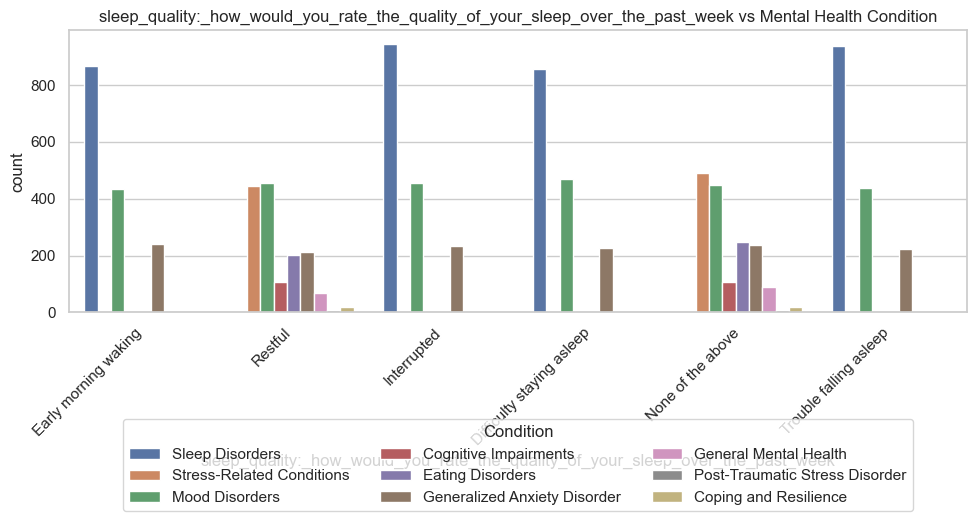

In [214]:
feature_name = df.columns[3]  # sleep quality column by position

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x=feature_name,
    hue="condition_label"
)

plt.xticks(rotation=45, ha="right")
plt.title(f"{feature_name} vs Mental Health Condition")

# Move legend to the bottom
plt.legend(
    title="Condition",
    bbox_to_anchor=(0.5, -0.35),
    loc="upper center",
    ncol=3
)

plt.tight_layout()
plt.show()

In [215]:
X = df.drop(columns=["condition_label"])
y = df["condition_label"]

X.shape, y.shape

((9504, 10), (9504,))

In [216]:
clean_path = Path("../Data/Cleaned/psych_assessment_cleaned.csv")

df.to_csv(clean_path, index=False)

clean_path

PosixPath('../Data/Cleaned/psych_assessment_cleaned.csv')